In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('C:/Users/DENVER/Udacity/machine-learning\projects/toxic-comment-classification/train.csv') #load the dataset
data.head() # have a look at the data


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [71]:
data.isnull().any() # check for empty entries

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool

In [72]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
comments_train, comments_test, labels_train, labels_test = train_test_split(data['comment_text'],\
                data[['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']], test_size=0.25, random_state=42)



In [81]:
# import keras library for preprocessing

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# turn sentences into bag of wards
max_words = 25000  # maximum number of common wards to be considered
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(comments_train) # fit tokenizer on train data



In [89]:

# turn senteces into sequences 
tokenized_comments_train = tokenizer.texts_to_sequences(comments_train)
tokenized_comments_test = tokenizer.texts_to_sequences(comments_test)

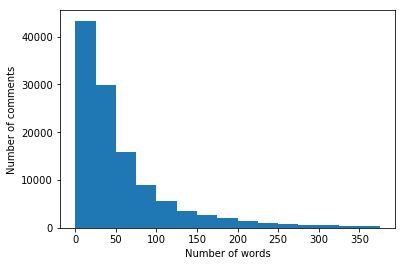

In [90]:
senteces_length = [len(comment) for comment in tokenized_comments_train]

plt.hist(senteces_length, bins=np.arange(0, 400, 25))
plt.ylabel('Number of comments')
plt.xlabel('Number of words')
plt.show()

In [91]:
# turn senteces to the same lenght(maxlen)
comments_train = pad_sequences(tokenized_comments_train, maxlen=150 )
comments_test = pad_sequences(tokenized_comments_test, maxlen=150)